In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h2>1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points</h2>

In [2]:
## Read csv and store it in the dataset

## EDA Pre-processing
## ------------------
## All columns except hp and car name are numeric. While car name is non-numeric, hp should be numeric
## When analysing, there are 6 rows which has '?' for 'hp' column and hence hp column is an object column
## Replace ? with median of remaining values for hp column
## Now that the entire hp column is numeric, change the column type as numeric instead of object
## On further analysis, it is found that there are no null columns and no NaN columns in the dataset

## Univariate Analysis
## --------------------
## cyl is within mean+-2(std-dev)
## disp - max value is beyond mean+2(std-dev), but within mean+3(std-dev)
## hp - max value is beyond mean+3(std-dev)
## wt - max value is beyond mean+2(std-dev), but within mean+3(std-dev) 
## acc - min and max value is beyond mean+-3(std-dev)
## yr - min and max value is within mean+-2(std-dev)
## mpg - min value is within mean+-2(std-dev), but max value is beyond mean+-3(std-dev), but within mean+-2(std-dev)

## Count
## -----
## yr - cars manufactured from 70's to 82's have equal representation in the dataset
## cyl - 4-cyl cars have larger representation in the dataset, 
##       6&8-cyl cars have the next learger representation in the dataset
##       3&5-cyl cars have very less representation in the dataset

## Bi-variate Analysis
## --------------------
## Analysis of continous and discrete variables with mpg

## Continous variables
##       1) Displacement - Displacement is negatively correlated with mpg. The higher the displacement, the lesser the mpg
##       2) Weight - Weight is negatively correlated with mpg. The higher the weight, the lesser the mpg
##       3) hp - HorsePower is also negatively correlated with mpg. The higher the hp, the lesser the mpg
##       4) Acceleration - Acceleration is positively correlated with mpg. The higher the acceleration power, the higher the mpg
## Discrete variables
##       1) Year - mpg has improved overtime, meaning the cars manufactured, recently has better mpg
##       2) cyl - 4&5 cyl cars have better mpg than other cyl cars

cars_df = pd.read_csv('cars-dataset.csv')
cars_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


<h3>EDA and Pre-Processing</h3>

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [4]:
cars_df[cars_df['hp']=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [5]:
cars_df['hp'].replace('?',cars_df[np.logical_not(cars_df['hp']=='?')]['hp'].median(),inplace=True)

In [6]:
cars_df['hp'].median()

93.5

In [7]:
cars_df1 = cars_df[np.logical_not(cars_df['hp']=='?')]
cars_df1.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [8]:
cars_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 28.0+ KB


In [9]:
cars_df1['hp'] = cars_df1['hp'].astype('int64')

<h3>Null and NaN check</h3>

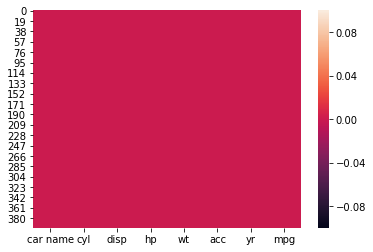

In [10]:
sns.heatmap(cars_df1.isnull())

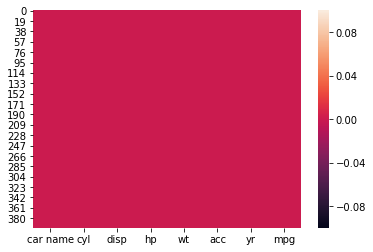

In [11]:
sns.heatmap(cars_df1.isna())

<h3>Univariate Analysis</h3>

In [12]:
cars_df1.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


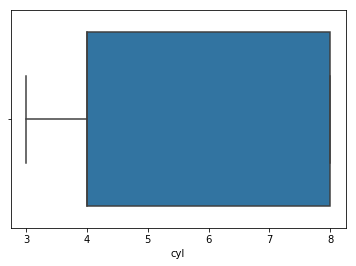

In [13]:
sns.boxplot(cars_df1['cyl'])

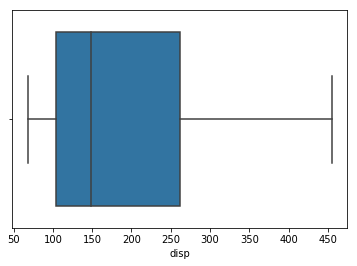

In [14]:
sns.boxplot(cars_df1['disp'])

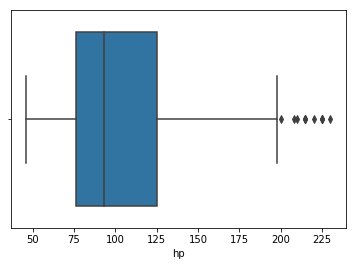

In [15]:
sns.boxplot(cars_df1['hp'])

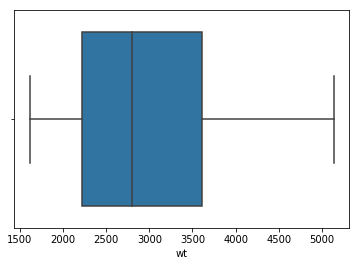

In [16]:
sns.boxplot(cars_df1['wt'])

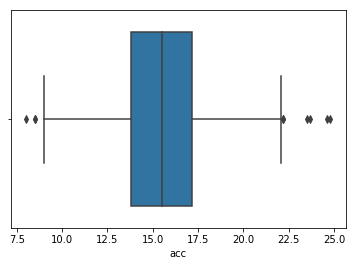

In [17]:
sns.boxplot(cars_df1['acc'])

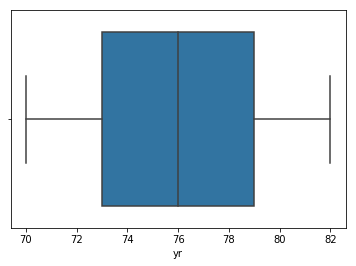

In [18]:
sns.boxplot(cars_df1['yr'])

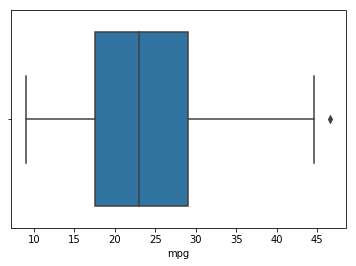

In [19]:
sns.boxplot(cars_df1['mpg'])

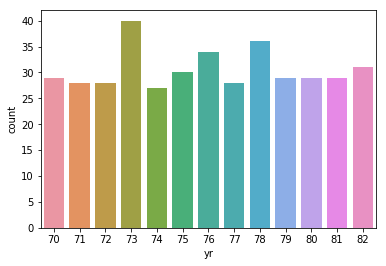

In [20]:
sns.countplot(x='yr',data=cars_df1)

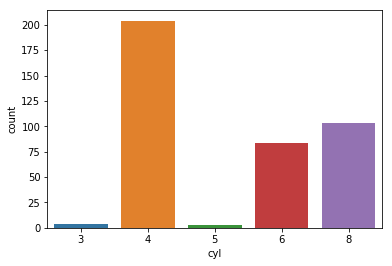

In [21]:
sns.countplot(x='cyl',data=cars_df1)

<h3>Bi-variate analysis</h3>

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


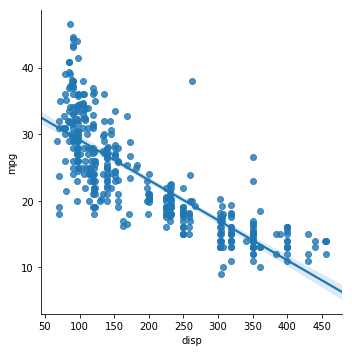

In [22]:
sns.lmplot(x='disp',y='mpg',data=cars_df1)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


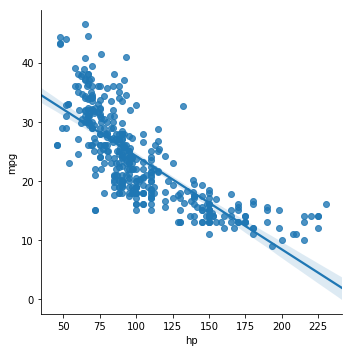

In [23]:
sns.lmplot(x='hp',y='mpg',data=cars_df1)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


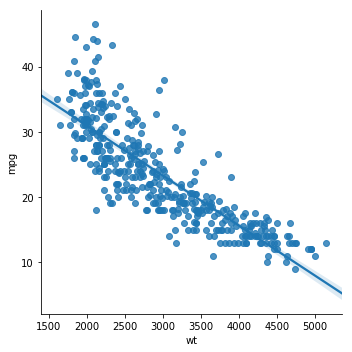

In [24]:
sns.lmplot(x='wt',y='mpg',data=cars_df1)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


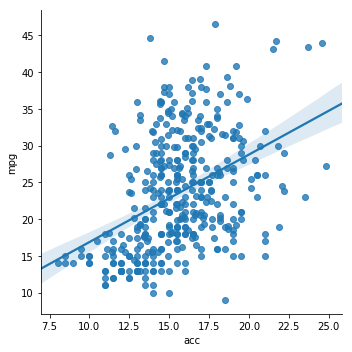

In [25]:
sns.lmplot(x='acc',y='mpg',data=cars_df1)

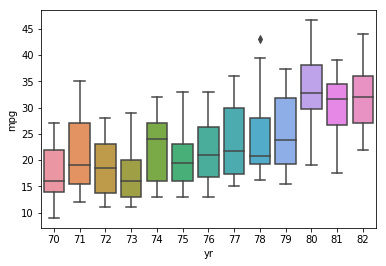

In [26]:
sns.boxplot(x='yr',y='mpg',data=cars_df1)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


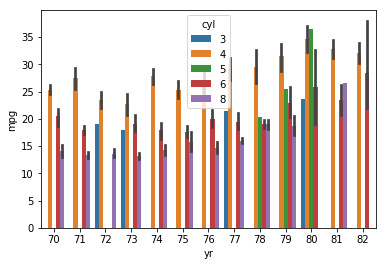

In [27]:
sns.barplot(x='yr',y='mpg',hue='cyl',data=cars_df1)

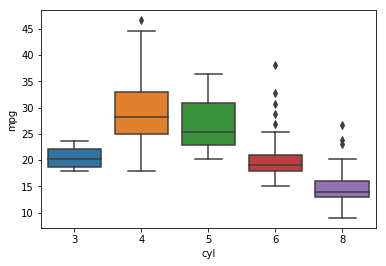

In [28]:
sns.boxplot(x='cyl',y='mpg',data=cars_df1)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


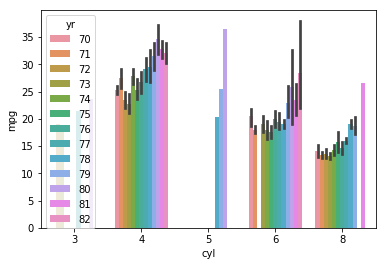

In [29]:
sns.barplot(x='cyl',y='mpg',hue='yr',data=cars_df1)

<h2>2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points<h2>

In [30]:
## Correlation of dependant variable (mpg) with independant variables
## -------------------------------------------------------------------
## mpg is very closely correlated with cyl,disp,hp,wt and moderately correlated with acc and yr

## Multi-collinearity b/w independant variables
## --------------------------------------------
## disp is closely correlated with cyl,hp,wt, but moderately correated with yr and acc
## hp is closely correlated with cyl,disp and wt, but little less closely correlated with acc and yr
## wt is closely correlated with cyl,disp and hp, but moderately correlated with acc and yr
## acc is moderately correlated with cyl,disp,hp,wt and very less correlated with ur
## yr is very less correlated with cyl,disp, hp, wt and acc

## Selection of independant variables for dependant variable (mpg) in the dataset
## -------------------------------------------------------------------------------
## Since cyl,hp,wt,disp are very closely related, we can take one among them, preferrably cyl
## acc and yr can also be used as independant variables

## Pairplot
## --------
## From the pairplot,we can observe that there may be 5 gaussians

In [31]:
cars_df1.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841367,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895849,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841367,0.895849,1.000000,0.862502,-0.686676,-0.413816,-0.773522
wt,0.896017,0.932824,0.862502,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686676,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413816,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773522,-0.831741,0.420289,0.579267,1.000000


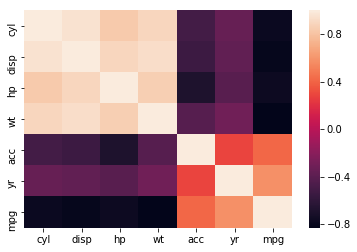

In [32]:
sns.heatmap(cars_df1.corr())

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\senth\AIML\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


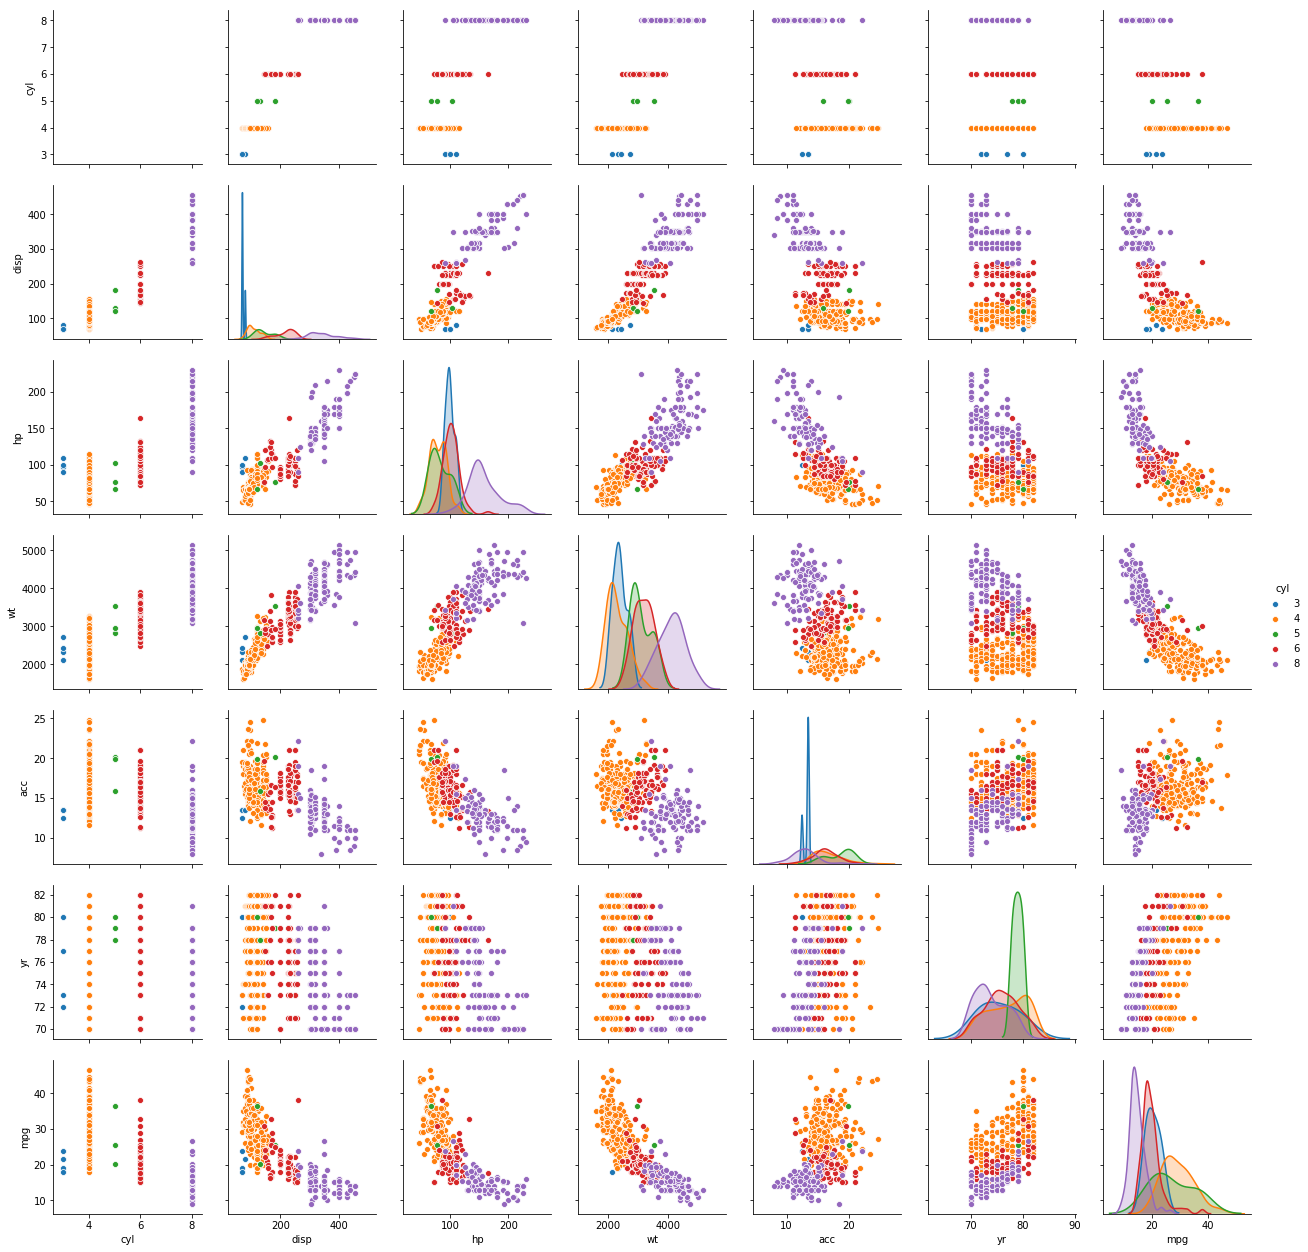

In [33]:
sns.pairplot(cars_df1,hue='cyl',diag_kind='kde')

<h2>3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)</h2>

In [ ]:
## Scaler
## ------
## Define the dataset as X_c with cyl,disp,hp,wt,acc,yr,mpg
## Clustering works fine with scaled data. Fit the dataset with standard scaler and transform the dataset for clustering

## Clustering
## -----------
## Tried different clustering methods - Non-hierarchial and hierarchial

## Non-hierarchial Clustering
## --------------------------
## Kmeans cluster
## --------------
## From the different possible combinations of clusters, it is seen that the error is minimal at n=5
## Also, from the silhouette score, the score is maximum when n=5

## DBSCAN cluster
## --------------
## DBScan clustering gives around 13 clusters, but those clusters does not provide clear indication of separation in mpg

## Hierarchial clustering
## -----------------------
## Agglomerative cluster
## ---------------------
## Different types of linkages were tried for agglomerative cluster
##      Average - 85.70
##      Centroid - 85.44
##      Single - 83.94
##      Complete - 69.75
##      Ward - 83.79
##      Median - 76.67
## Cophenet co-efficient is used to find the best linkage in agglomerative clustering
## Dendograms for each of the above are given in the section below
## Average linkage gives the best cophenet co-efficient of 85.7 among all linkages


In [34]:
X_c = cars_df1[['cyl','disp','hp','wt','acc','yr','mpg']]

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cars_arr = ss.fit_transform(X_c)
X_ss = pd.DataFrame(data=cars_arr,columns=X_c.columns)
X_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null float64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null float64
acc     398 non-null float64
yr      398 non-null float64
mpg     398 non-null float64
dtypes: float64(7)
memory usage: 21.8 KB


In [36]:
X_ss.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,2.482660e-16,-9.902743e-17,8.982206e-17,-8.837152e-16,2.761610e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.527015e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-1.859374e+00
25%,-8.563206e-01,-8.563178e-01,-7.411966e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.704907e-01
50%,-8.563206e-01,-4.314040e-01,-2.958995e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-6.591883e-02
75%,1.498191e+00,6.584879e-01,5.423069e-01,7.538337e-01,5.834349e-01,8.096310e-01,7.027050e-01
max,1.498191e+00,2.511784e+00,3.292671e+00,2.565185e+00,3.351912e+00,1.621983e+00,2.957335e+00


<h3>Non-Hierarchial Clustering</h3>

<h3>K-Means Clustering</h3>

<h3>Inertia and Silhoutte Score Analysis with clusters from 2-15</h3>

In [37]:
## From the different possible combinations of clusters, it is seen that the error is minimal at n=5
## Also, from the silhouette score, the score is maximum when n=5

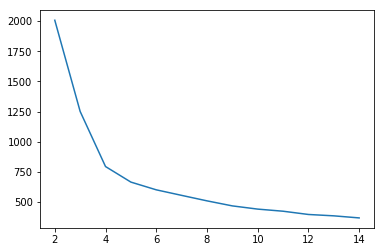

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
clusternos = []
silhoutte = []
clusters = np.arange(2,15)
for cluster in clusters:
    kmc_cluster = KMeans(n_clusters=cluster, random_state=1)
    kmc_cluster.fit(X_ss)
    ##print(kmc_cluster.cluster_centers_)
    ##print(kmc_cluster.inertia_)
    ##print(kmc_cluster.labels_)
    inertia.append(kmc_cluster.inertia_)
    silhoutte.append(silhouette_score(X_ss,kmc_cluster.labels_))
    clusternos.append(cluster)

plt.plot(clusternos,inertia)


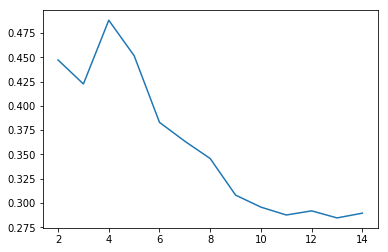

In [81]:
plt.plot(clusternos,silhoutte)

<h3>Clusters with 5 clusters</h3>

[[-0.83529814 -0.78884261 -0.7566323  -0.77901252  0.39573612  1.10700998
   1.18892823  1.58928571]
 [ 1.49819126  1.50888348  1.53119879  1.4096026  -1.08936323 -0.70443089
  -1.16816399  3.75268817]
 [-0.87415778 -0.81434294 -0.55651602 -0.75704723  0.3273543  -0.62361034
   0.20801664  1.93939394]
 [ 0.45677256  0.28472629  0.00398765  0.35361011  0.29692846  0.21598882
  -0.44333285  0.14102564]
 [ 0.32093534  0.4022193  -0.17966383  0.22015298  0.08873995 -0.84892189
  -0.65839971  3.        ]]
781.314297667145
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 2 2 2 2 2 2 3 1 1 1 1 2 2 2 2 3 4 4 4
 4 1 1 1 1 1 1 1 3 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 4 3 4 4 3 2 1 1 1 1 4 2 2 2
 2 2 3 2 1 1 2 2 2 2 1 2 3 1 4 3 4 3 2 2 2 2 3 3 3 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 4 4 3 3 1 1 1 1 3 3 3 3 3 3 1 2 2 4 2 2 2 2 3 2 4 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 3 3 3 3 2 2 2 0 3 3 3 3 2 0 2 2 2 1 2 3 3 1 1 1 1 0 0 0 2 0 1
 3 1 1 3 3 3 3 1 1 1 1 0 2 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192108E55F8>,
      dtype=object)

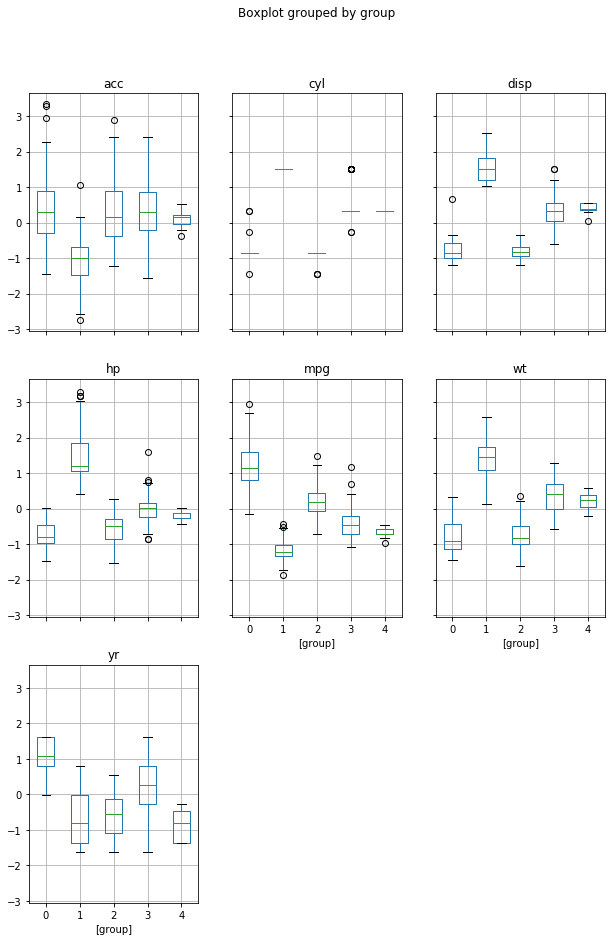

In [103]:
from sklearn.cluster import KMeans
kmc_cluster = KMeans(n_clusters=5)
kmc_cluster.fit(X_ss)
print(kmc_cluster.cluster_centers_)
print(kmc_cluster.inertia_)
print(kmc_cluster.labels_)
X_ss['group']=kmc_cluster.predict(X_ss)
X_ss.info()
X_ss.boxplot(by='group',figsize=(10,15))


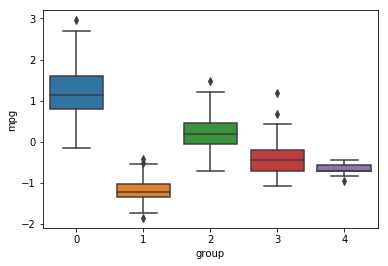

In [104]:
sns.boxplot(x='group',y='mpg',data=X_ss)

<h3>DBScan Clustering</h3>

In [206]:
## DBSCAN cluster
## --------------
## DBScan clustering gives around 13 clusters, but those clusters does not provide clear indication of separation in mpg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null float64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null float64
acc     398 non-null float64
yr      398 non-null float64
mpg     398 non-null float64
dtypes: float64(7)
memory usage: 21.8 KB


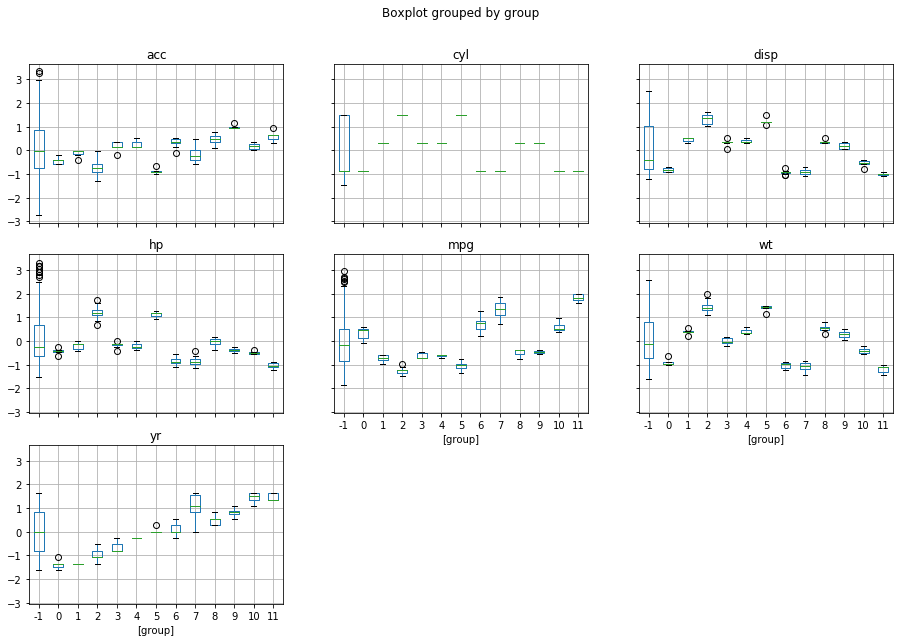

In [94]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cars_arr = ss.fit_transform(X_c)
X_ss = pd.DataFrame(data=cars_arr,columns=X_c.columns)
X_ss.info()
from sklearn.cluster import DBSCAN
dbscan_clusters = DBSCAN()
dbscan_clusters.fit(X_ss)
X_ss['group'] = dbscan_clusters.fit_predict(X_ss)
X_ss.boxplot(by='group',figsize=(15,10))


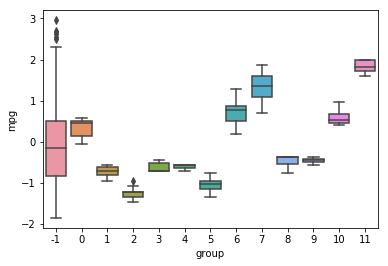

In [100]:
sns.boxplot(x='group',y='mpg',data=X_ss)

<h3>Hierarchial Clustering</h3>

In [207]:
## Hierarchial clustering
## -----------------------
## Agglomerative cluster
## ---------------------
## Different types of linkages were tried for agglomerative cluster
##      Average - 85.70
##      Centroid - 85.44
##      Single - 83.94
##      Complete - 69.75
##      Ward - 83.79
##      Median - 76.67
## Cophenet co-efficient is used to find the best linkage in agglomerative clustering
## Dendograms for each of the above are given in the section below
## Average linkage gives the best cophenet co-efficient of 85.7 among all linkages


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null float64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null float64
acc     398 non-null float64
yr      398 non-null float64
mpg     398 non-null float64
dtypes: float64(7)
memory usage: 21.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019214A1B2E8>,
      dtype=object)

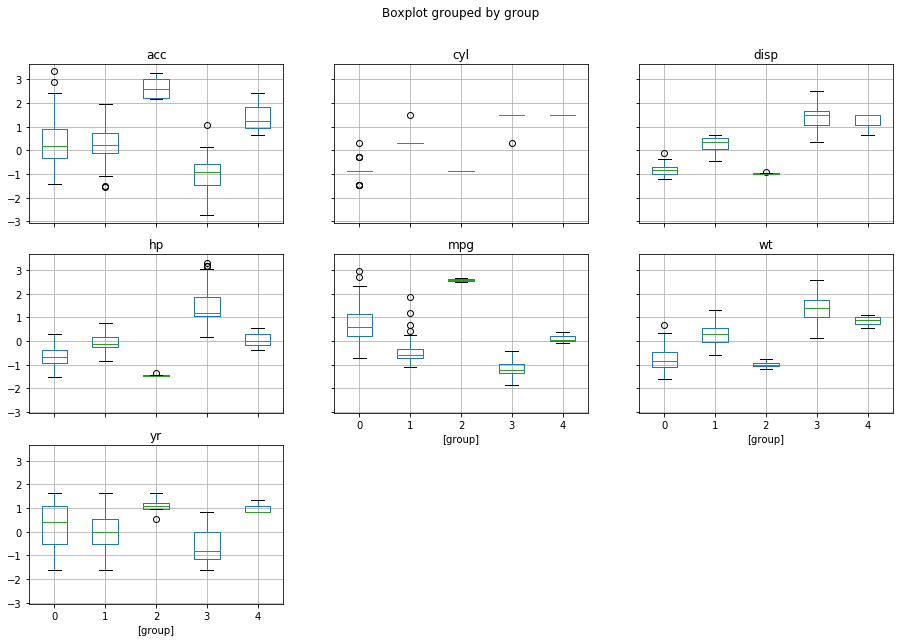

In [208]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cars_arr = ss.fit_transform(X_c)
X_ss = pd.DataFrame(data=cars_arr,columns=X_c.columns)
X_ss.info()
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5,linkage='average')
X_ss['group'] = agc.fit_predict(X_ss)
X_ss.boxplot(by='group',figsize=(15,10))

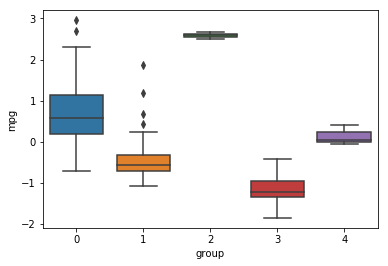

In [209]:
sns.boxplot(x='group',y='mpg',data=X_ss)

0.857009185484371


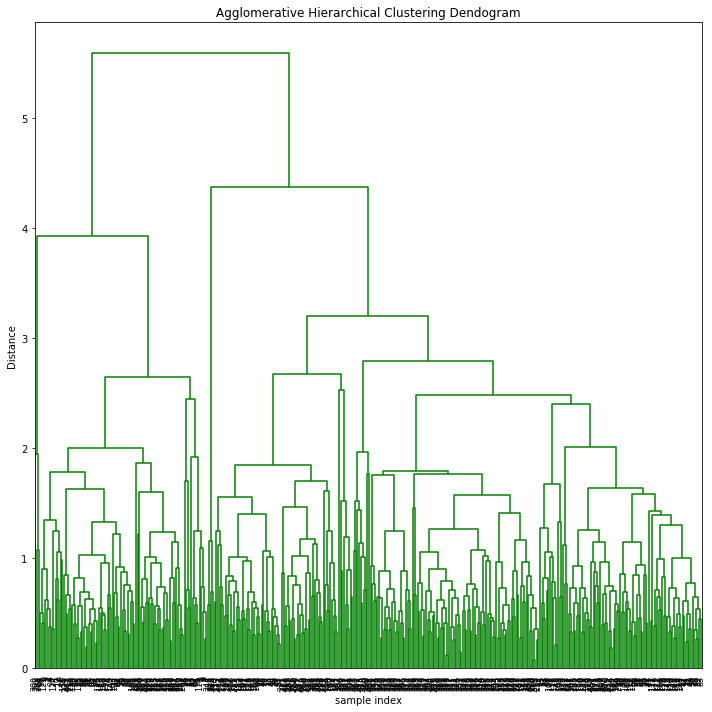

In [210]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_ss, 'average')
c, coph_dists = cophenet(Z , pdist(X_ss))

print(c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

0.697515404307882


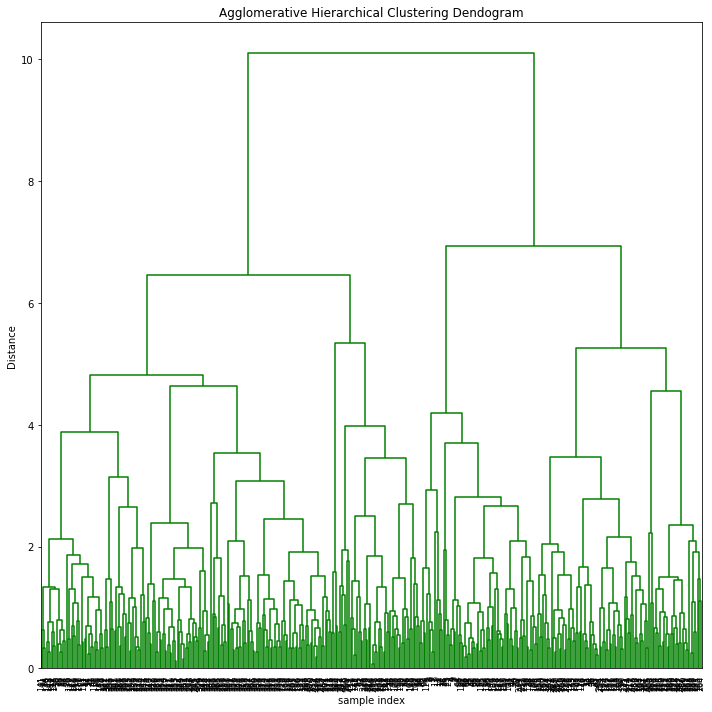

In [44]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_ss, 'complete')
c, coph_dists = cophenet(Z , pdist(X_ss))

print(c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

0.8394716642027849


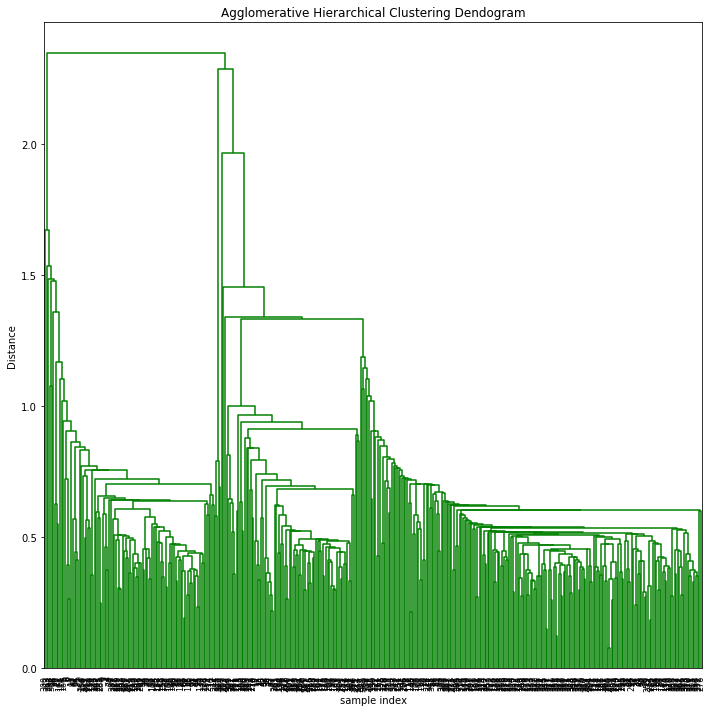

In [45]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_ss, 'single')
c, coph_dists = cophenet(Z , pdist(X_ss))

print(c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

0.8544562644399748


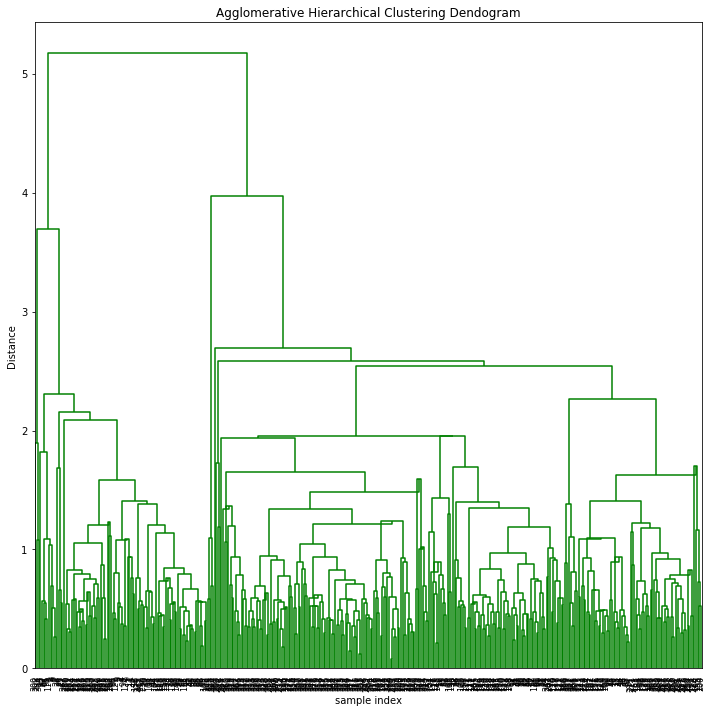

In [46]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_ss, 'centroid')
c, coph_dists = cophenet(Z , pdist(X_ss))

print(c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

0.7666945516169142


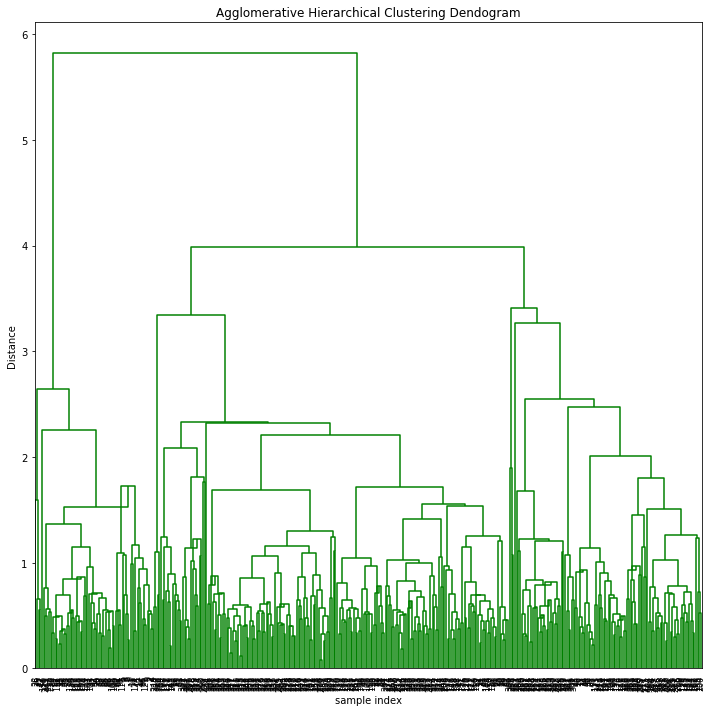

In [47]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_ss, 'median')
c, coph_dists = cophenet(Z , pdist(X_ss))

print(c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

0.837951051115256


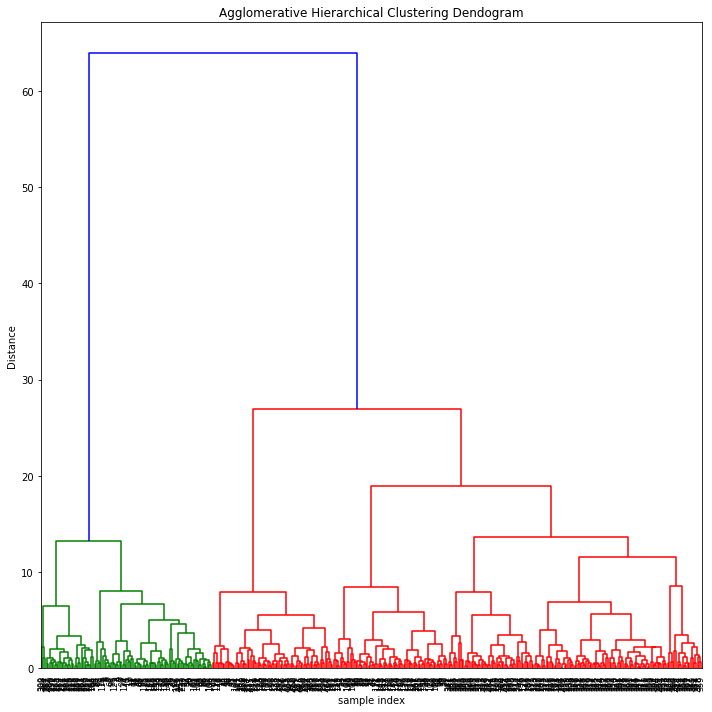

In [48]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_ss, 'ward')
c, coph_dists = cophenet(Z , pdist(X_ss))

print(c)
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

<h2>4.Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)</h2>

In [ ]:
## Different Regression model algos were used on the entire dataset before clustering them into different groups
## RandomForestRegressor gives the best accuracy score of 86% and r2_Score of 3.04, but it is not interpretable
## BaggingRegressor gives the next best accuracy score of 85.97% and r2_Score of 3.053, but it is not interpretable
## Next comes GradientBoostRegressor which gives accuracy score of 84% and r2_score of 3.25, but it is not interpretable
## The next is LinearRegression which gives accuracy score of 81% and r2_score of 3.5, which will be the simplest model of the above

## The best simple model among the above is LinearRegression 

## Since the number of clusters decided is 5 and also the best clustering method is KMeans, clustering is done using KMeans
## The groups are labelled from 0-4
## For each group, linear regression is done and the r2_score along with RMSE is also displayed in the dataframe

## Looks like, clustering has not helped the linear regression to achieve less errors/more accuracy. In fact, it is much more
## better when it is done as a whole dataset instead of clustering

<h3>Regression Model Algorithms</h3>

In [49]:
## RandomForestRegressor gives the best accuracy score of 86% and r2_Score of 3.04, but it is not interpretable
## BaggingRegressor gives the next best accuracy score of 85.97% and r2_Score of 3.053, but it is not interpretable
## Next comes GradientBoostRegressor which gives accuracy score of 84% and r2_score of 3.25, but it is not interpretable
## The next is LinearRegression which gives accuracy score of 81% and r2_score of 3.5, which will be the simplest model of the above


In [111]:
X = cars_df1[['cyl','disp','hp','wt','acc','yr']]
Y = cars_df1['mpg']
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
modelscores=[]
meansquareerrors=[]
models=[]

0.8268169711053964
3.1820562609792797
0.8268169711053964


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


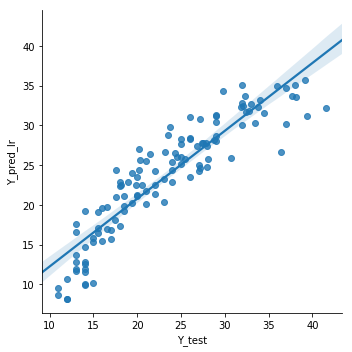

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
print(lr.score(X_test,Y_test))
Y_pred_lr = lr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))
print(r2_score(Y_test,Y_pred_lr))
test_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_lr':Y_pred_lr})
modelscores.append(r2_score(Y_test,Y_pred_lr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))
models.append('LinearRegression')
sns.lmplot(x='Y_test',y='Y_pred_lr',data=test_pred_df)

0.7186381820039899
4.055904954507686


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


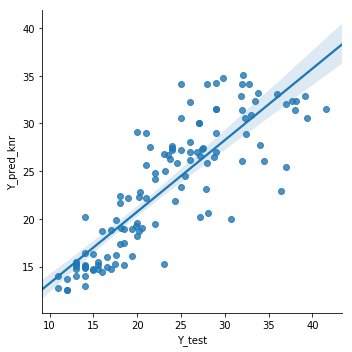

In [113]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(X_train,Y_train)
print(knr.score(X_test,Y_test))
Y_pred_knr = knr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_knr)))
knr_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_knr':Y_pred_knr})
modelscores.append(r2_score(Y_test,Y_pred_knr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_pred_knr)))
models.append('KNN')
sns.lmplot(x='Y_test',y='Y_pred_knr',data=knr_pred_df)

0.9764536484112082
1.1733214243355115


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


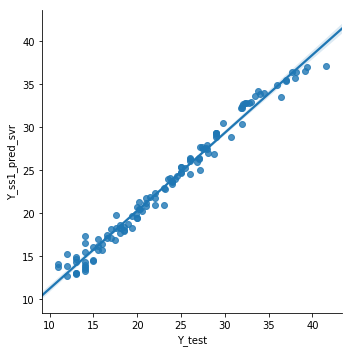

In [114]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cars_arr = ss.fit_transform(X_c)
X_ss1 = pd.DataFrame(data=cars_arr,columns=X_c.columns)
Y_ss1 = cars_df1['mpg']

X_ss1_train,X_ss1_test,Y_ss1_train,Y_ss1_test = train_test_split(X_ss1,Y_ss1,test_size=0.3,random_state=1) 
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_ss1_train,Y_ss1_train)
print(svr.score(X_ss1_test,Y_ss1_test))
Y_ss1_pred_svr = svr.predict(X_ss1_test)
print(np.sqrt(mean_squared_error(Y_ss1_test,Y_ss1_pred_svr)))
svr_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_ss1_pred_svr':Y_ss1_pred_svr})
modelscores.append(r2_score(Y_test,Y_ss1_pred_svr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_ss1_pred_svr)))
models.append('SVM')
sns.lmplot(x='Y_test',y='Y_ss1_pred_svr',data=svr_pred_df)

0.7594153277215201
3.7504999666711103


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


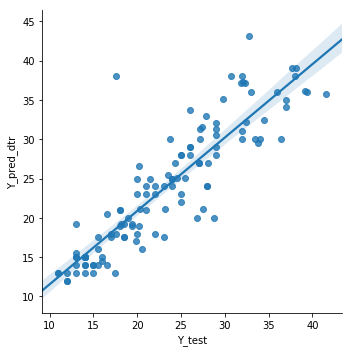

In [115]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
print(dtr.score(X_test,Y_test))
Y_pred_dtr = dtr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_dtr)))
dtr_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_dtr':Y_pred_dtr})
modelscores.append(r2_score(Y_test,Y_pred_dtr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_pred_dtr)))
models.append('DecisionTreeRegressor')
sns.lmplot(x='Y_test',y='Y_pred_dtr',data=dtr_pred_df)

0.8672626967404514
2.7858112223671347


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


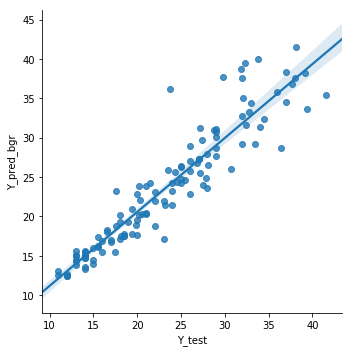

In [116]:
from sklearn.ensemble import BaggingRegressor
bgr = BaggingRegressor()
bgr.fit(X_train,Y_train)
print(bgr.score(X_test,Y_test))
Y_pred_bgr = bgr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_bgr)))
bgr_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_bgr':Y_pred_bgr})
modelscores.append(r2_score(Y_test,Y_pred_bgr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_pred_bgr)))
models.append('BaggingRegressor')
sns.lmplot(x='Y_test',y='Y_pred_bgr',data=bgr_pred_df)

0.8360377950326132
3.0961861496632026


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


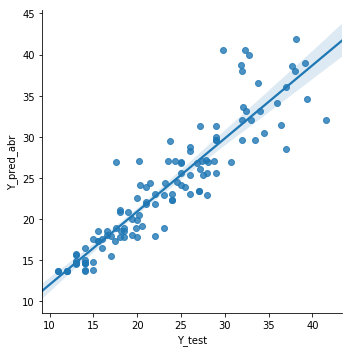

In [117]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train,Y_train)
print(abr.score(X_test,Y_test))
Y_pred_abr = abr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_abr)))
abr_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_abr':Y_pred_abr})
modelscores.append(r2_score(Y_test,Y_pred_abr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_pred_abr)))
models.append('AdaBoostRegressor')
sns.lmplot(x='Y_test',y='Y_pred_abr',data=abr_pred_df)

0.8765775788048954
2.6862858188161858


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


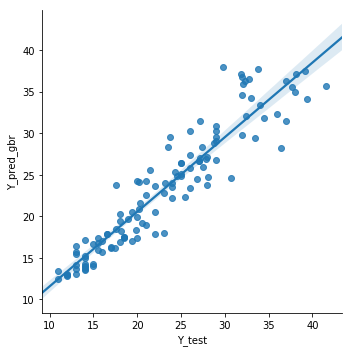

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
print(gbr.score(X_test,Y_test))
Y_pred_gbr = gbr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_gbr)))
gbr_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_gbr':Y_pred_gbr})
modelscores.append(r2_score(Y_test,Y_pred_gbr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_pred_gbr)))
models.append('GradientBoostingRegressor')
sns.lmplot(x='Y_test',y='Y_pred_gbr',data=gbr_pred_df)

0.8312303975765222
3.1412485575006643


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


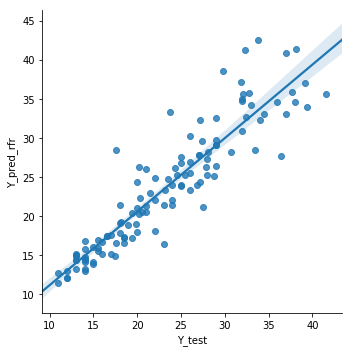

In [119]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
print(rfr.score(X_test,Y_test))
Y_pred_rfr = rfr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rfr)))
rfr_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_rfr':Y_pred_rfr})
modelscores.append(r2_score(Y_test,Y_pred_rfr))
meansquareerrors.append(np.sqrt(mean_squared_error(Y_test,Y_pred_rfr)))
models.append('RandomForestRegressor')
sns.lmplot(x='Y_test',y='Y_pred_rfr',data=rfr_pred_df)

In [121]:
scores_df = pd.DataFrame(data={'models':models,'scores':modelscores,'errors':meansquareerrors})
scores_df

,models,scores,errors
0,LinearRegression,0.826817,3.182056
1,KNN,0.718638,4.055905
2,SVM,0.976454,1.173321
3,DecisionTreeRegressor,0.759415,3.750500
4,BaggingRegressor,0.867263,2.785811
5,AdaBoostRegressor,0.836038,3.096186
6,GradientBoostingRegressor,0.876578,2.686286
7,RandomForestRegressor,0.831230,3.141249


<h3>No. of clusters is decided as 5 as there are five gaussian curves</h3>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null float64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null float64
acc     398 non-null float64
yr      398 non-null float64
mpg     398 non-null float64
dtypes: float64(7)
memory usage: 21.8 KB
[[-0.81998551 -0.88148012 -0.90838511 -0.92235119  0.6297163   1.07038607
   1.42388295]
 [ 0.44447454  0.36815832 -0.05692012  0.4054654   0.40155931 -0.0628957
  -0.5642591 ]
 [-0.84160487 -0.83093102 -0.60957199 -0.82158114  0.42776487 -0.85569149
   0.20870407]
 [ 1.49819126  1.50392292  1.5217933   1.40409797 -1.0861486  -0.68832385
  -1.16379715]
 [-0.69492258 -0.53734206 -0.25956593 -0.39340273 -0.25252493  0.8314684
   0.37211412]]
665.2782189837579
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 1 2 2 2 2 2 2 2 2 3 3 3 3 2 2 2 2 1 1 1 1
 1 3 3 3 3 3 3 3 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019217C0D908>,
      dtype=object)

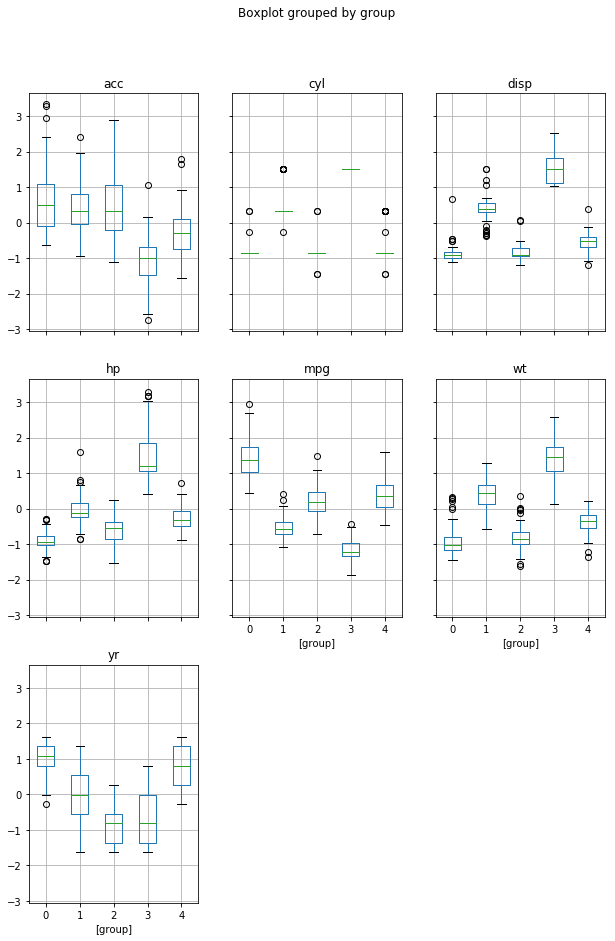

In [244]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cars_arr = ss.fit_transform(X_c)
X_ss = pd.DataFrame(data=cars_arr,columns=X_c.columns)
X_ss.info()
from sklearn.cluster import KMeans
kmc_cluster = KMeans(n_clusters=5)
kmc_cluster.fit(X_ss)
print(kmc_cluster.cluster_centers_)
print(kmc_cluster.inertia_)
print(kmc_cluster.labels_)
X_ss['group']=kmc_cluster.predict(X_ss)
X_ss.info()
X_ss.boxplot(by='group',figsize=(10,15))

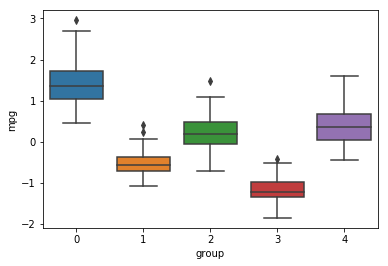

In [245]:
sns.boxplot(x='group',y='mpg',data=X_ss)

<h3>Groupwise Linear Regression</h3>

In [246]:
cars_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
group       398 non-null int32
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 49.5+ KB


In [247]:
cars_df1['group'] = X_ss['group']

In [248]:
X_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl      398 non-null float64
disp     398 non-null float64
hp       398 non-null float64
wt       398 non-null float64
acc      398 non-null float64
yr       398 non-null float64
mpg      398 non-null float64
group    398 non-null int32
dtypes: float64(7), int32(1)
memory usage: 23.4 KB


In [249]:
cars_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
group       398 non-null int32
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 49.5+ KB


In [ ]:
## hp versus mpg with cluster centers in each group

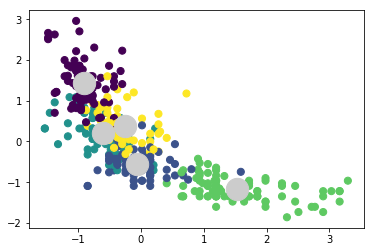

In [250]:
plt.scatter(X_ss['hp'],X_ss['mpg'],c=X_ss['group'],
            s=50, cmap='viridis')
plt.scatter(kmc_cluster.cluster_centers_[:,2],kmc_cluster.cluster_centers_[:,6],s=500, c='.80')

In [ ]:
## cyl versus mpg with cluster centers in each group

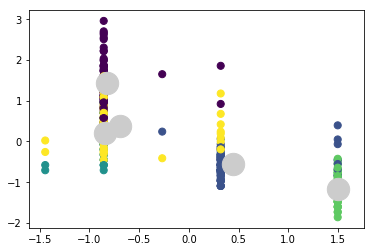

In [251]:
plt.scatter(X_ss['cyl'],X_ss['mpg'],c=X_ss['group'],
            s=50, cmap='viridis')
plt.scatter(kmc_cluster.cluster_centers_[:,0],kmc_cluster.cluster_centers_[:,6],s=500, c='.80')

In [ ]:
## disp versus mpg with cluster centers in each group

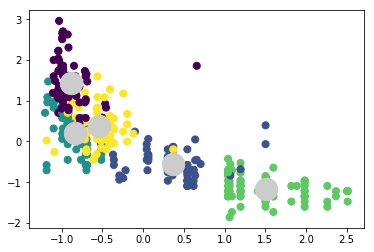

In [252]:
plt.scatter(X_ss['disp'],X_ss['mpg'],c=X_ss['group'],
            s=50, cmap='viridis')
plt.scatter(kmc_cluster.cluster_centers_[:,1],kmc_cluster.cluster_centers_[:,6],s=500, c='.80')

In [ ]:
## wt versus mpg with cluster centers in each group

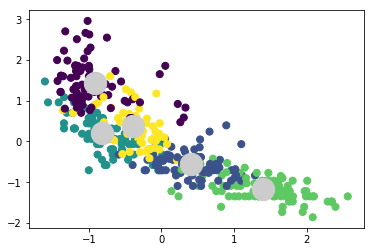

In [253]:
plt.scatter(X_ss['wt'],X_ss['mpg'],c=X_ss['group'],
            s=50, cmap='viridis')
plt.scatter(kmc_cluster.cluster_centers_[:,3],kmc_cluster.cluster_centers_[:,6],s=500, c='.80')

In [ ]:
## acc versus mpg with cluster centers in each group

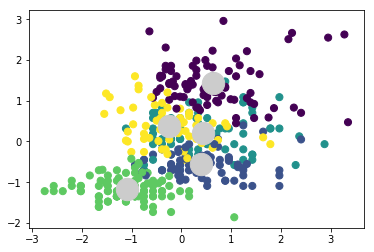

In [254]:
plt.scatter(X_ss['acc'],X_ss['mpg'],c=X_ss['group'],
            s=50, cmap='viridis')
plt.scatter(kmc_cluster.cluster_centers_[:,4],kmc_cluster.cluster_centers_[:,6],s=500, c='.80')

In [ ]:
## yr versus mpg with cluster centers in each group

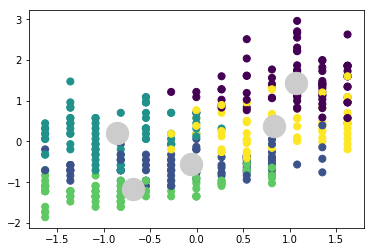

In [255]:
plt.scatter(X_ss['yr'],X_ss['mpg'],c=X_ss['group'],
            s=50, cmap='viridis')
plt.scatter(kmc_cluster.cluster_centers_[:,5],kmc_cluster.cluster_centers_[:,6],s=500, c='.80')

In [ ]:
## Printing count of cars in each groups

In [256]:
cars_df1['group'].value_counts()

3    94
1    81
0    81
2    80
4    62
Name: group, dtype: int64

In [ ]:
## Save the car dataset of each groups in different dataset

In [257]:
cars0 = cars_df1[cars_df1['group']==0]
cars1 = cars_df1[cars_df1['group']==1]
cars2 = cars_df1[cars_df1['group']==2]
cars3 = cars_df1[cars_df1['group']==3]
cars4 = cars_df1[cars_df1['group']==4]
cars = [cars0,cars1,cars2,cars3,cars4]

In [258]:
print(cars4.shape)

(62, 9)


In [259]:
groupr2scores=[]
rmse=[]
coeff=[]
intercept=[]
count=[]
groups=np.arange(0,5)

In [260]:
for car in cars:
    from sklearn.linear_model import LinearRegression
    ##print('size of the group is ',car.size)
    X = car[['cyl','disp','hp','wt','acc','yr']]
    Y = car['mpg']
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    ##print('accuracy score is ',lr.score(X_test,Y_test))
    ##print('lr.coeff_ is ',lr.coef_)
    ##print('lr.intercept_ is ',lr.intercept_)
    Y_pred_lr = lr.predict(X_test)
    ##print('RMSE of this group  is ', np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))
    ##print('R2-score is ',r2_score(Y_test,Y_pred_lr))
    test_pred_df = pd.DataFrame(data={'Y_test':Y_test,'Y_pred_lr':Y_pred_lr})
    groupr2scores.append(r2_score(Y_test,Y_pred_lr))
    rmse.append(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))
    coeff.append(lr.coef_)
    intercept.append(lr.intercept_)
    count.append(car['mpg'].count())
    ##sns.lmplot(x='Y_test',y='Y_pred_lr',data=test_pred_df)
group_df = pd.DataFrame(data={'group':groups,'count':count,'r2_scores':groupr2scores,'rmse':rmse})
group_df

,group,count,r2_scores,rmse
0,0,81,-0.033972,5.331932
1,1,81,0.132778,2.055674
2,2,80,0.477524,2.622144
3,3,94,0.312252,1.680448
4,4,62,-0.527845,3.987831


In [261]:
coeff

[array([ 2.71886364,  0.01843459,  0.02682415, -0.00769104,  0.22550077,
         0.63870721]),
 array([ 0.92531747, -0.00246612, -0.03904543, -0.00321249,  0.11409656,
         0.3310168 ]),
 array([ 4.45083754e+00, -1.01278542e-01, -4.01753466e-03, -3.82448534e-03,
        -1.05999178e-01,  1.76555100e-01]),
 array([ 0.00000000e+00,  4.05600241e-04, -3.41165392e-02, -1.29230538e-03,
        -4.74082429e-01,  3.11220845e-01]),
 array([-0.65080698,  0.00797605, -0.13151015, -0.00446276, -0.68988712,
         0.90198735])]

In [262]:
intercept

[-19.070848228183102,
 1.571131949435408,
 15.940319548375468,
 8.368607100415097,
 -8.537803600287194]